In [ ]:
import fitz
def generate_text_only_image(input_pdf, page_num=0, layer_name="$xref", dpi=300):
    # Open the PDF
    doc = fitz.open(input_pdf)
    page = doc[page_num]
    drawings = page.get_drawings()
    # Get page dimensions
    page_width = page.rect.width
    page_height = page.rect.height

    # Step 1: Handle layers (OCGs - Optional Content Groups)

    new_doc = fitz.open()
    new_page = new_doc.new_page(width=page_width, height=page_height)


    shape = new_page.new_shape()


    for drawing in drawings:
        if drawing.get('layer') == layer_name:
            for item in drawing.get("items"):
                if item[0] == "l":  # line
                    shape.draw_line(item[1], item[2])
                elif item[0] == "re":  # rectangle
                    shape.draw_rect(item[1])
                elif item[0] == "qu":  # quad
                    shape.draw_quad(item[1])
                elif item[0] == "c":  # curve
                    shape.draw_bezier(item[1], item[2], item[3], item[4])
                else:
                    raise ValueError("unhandled drawing", item)

    shape.finish(
        fill=None,  # fill color
        color=(1, 0, 0),  # line color  )
        width=1,          # Line width
        )

    shape.commit()

    # Step 2: Create a new PDF with just the visible content
    # Create a new document


    # Render the page with current layer settings
    pix = new_page.get_pixmap(dpi=dpi)
    img_data = pix.tobytes("png")
    return new_page, img_data

file = "C:/Users/roba7/Documents/Programming projects/as-built-processing/as-built-processing-test/pdf-layout-extraction-test/NorthStar_As_Built/NorthStarAsBuiltRev220161115_page14.pdf"
page_num = 0
new_page, img_data = generate_text_only_image(file, page_num)

from PIL import Image
import io
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
im = Image.open(io.BytesIO(img_data))
ax.imshow(im)
ax.axis('off')
fig.show()

In [10]:
import fitz

input_pdf = "C:/Users/roba7/Documents/Programming projects/as-built-processing/as-built-processing-test/pdf-layout-extraction-test/NorthStar_As_Built/NorthStarAsBuiltRev220161115_page14.pdf"

doc = fitz.open(input_pdf)
page = doc[0]
pix = page.get_pixmap(dpi=300)

ocr = pix.pdfocr_tobytes()





In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
im = Image.open(io.BytesIO(img_data))
ax.imshow(im)
ax.axis('off')
fig.show()

In [13]:
import fitz

doc_ocr = fitz.open("pdf", pix.pdfocr_tobytes())









In [20]:
words

[(2732.39990234375,
  135.5999755859375,
  2870.638671875,
  150.97532653808594,
  'RENEWABLE',
  0,
  0,
  0),
 (2879.52001953125,
  135.5999755859375,
  2970.7578125,
  150.97532653808594,
  'ENERGY',
  0,
  0,
  1),
 (938.4000244140625,
  156.719970703125,
  1009.1618041992188,
  195.63885498046875,
  'GENERAL',
  1,
  0,
  0),
 (1016.6400146484375,
  156.719970703125,
  1066.212158203125,
  195.63885498046875,
  'NOTES',
  1,
  0,
  1),
 (1434.9599609375,
  156.719970703125,
  1483.559814453125,
  195.63885498046875,
  'KEYED',
  1,
  1,
  0),
 (1493.280029296875,
  156.719970703125,
  1545.767822265625,
  195.63885498046875,
  'NOTES',
  1,
  1,
  1),
 (2062.080078125,
  156.719970703125,
  2151.308837890625,
  195.63885498046875,
  'SUB-ARRAY',
  1,
  2,
  0),
 (2161.199951171875,
  156.719970703125,
  2219.519775390625,
  195.63885498046875,
  'WIRING',
  1,
  2,
  1),
 (2229.360107421875,
  156.719970703125,
  2257.35400390625,
  195.63885498046875,
  'KEY',
  1,
  2,
  2),
 (9

c:\Users\roba7\Documents\Programming projects\as-built-processing\pdf_layout_extraction_dev\.venv\Lib\site-packages\PIL\Image.py:3452: DecompressionBombWarning: Image size (113400000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


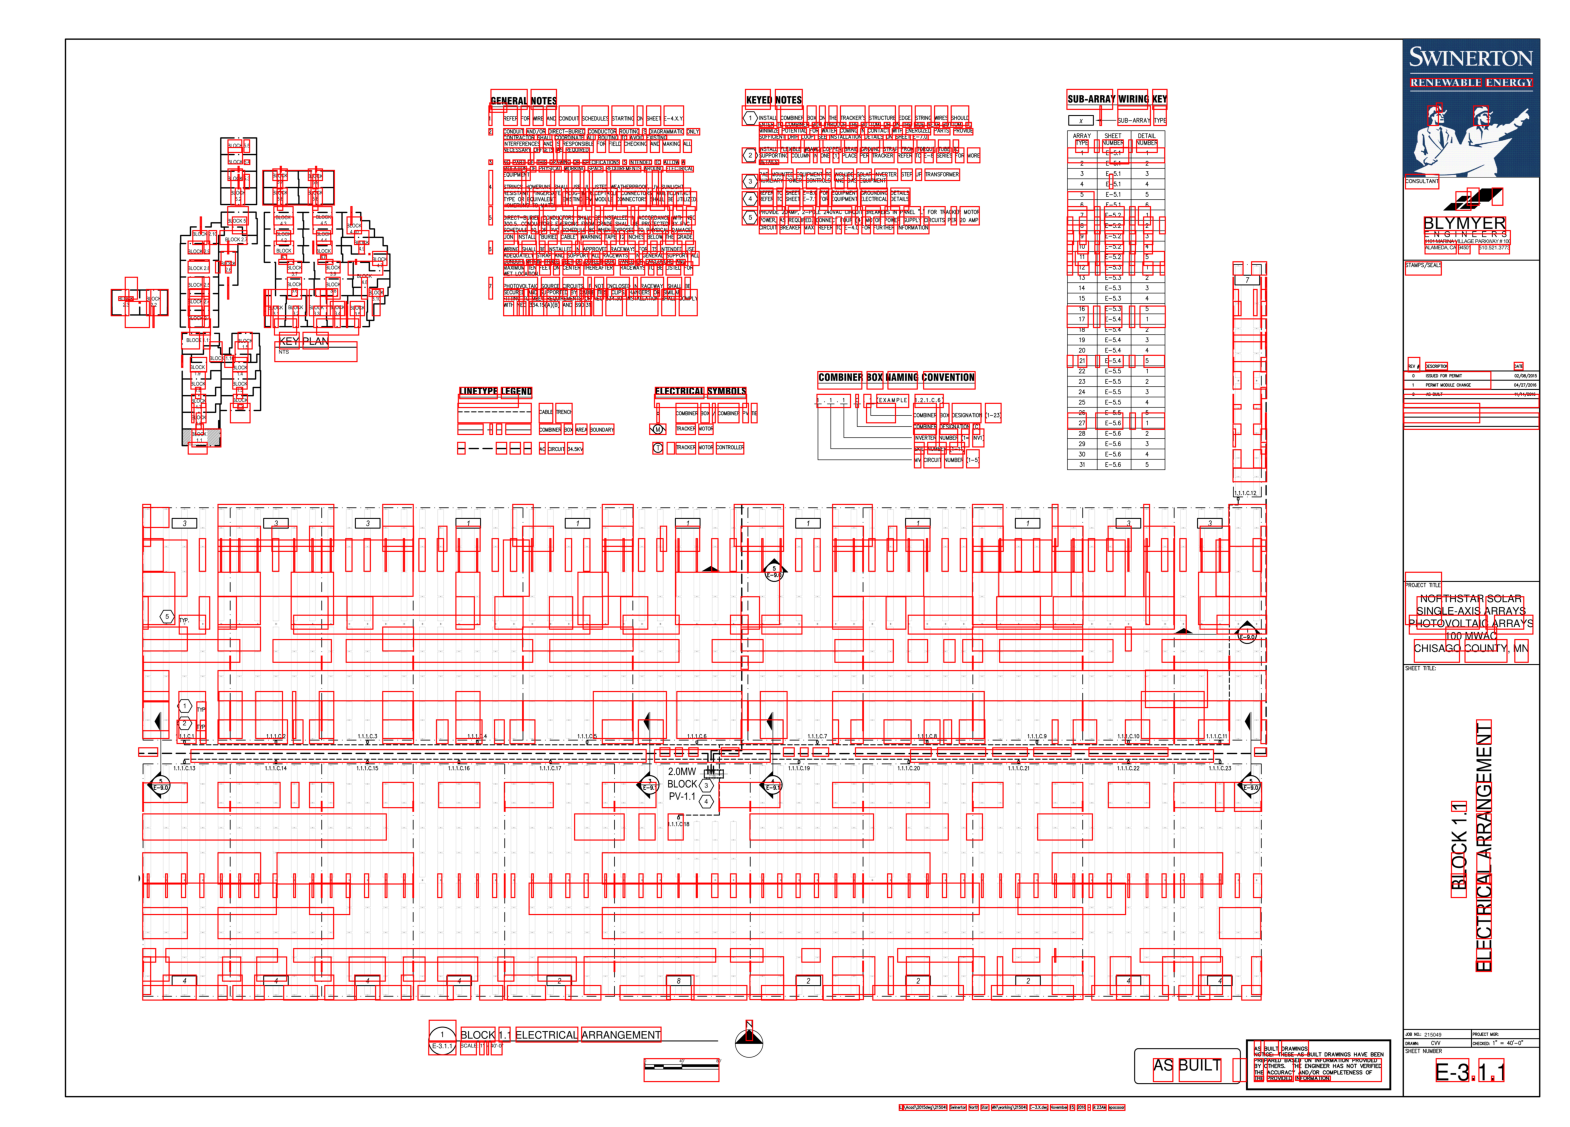

In [21]:
page = doc_ocr[0]
words = page.get_text("words")

# Draw rectangles on the page using PyMuPDF's Shape
shape = page.new_shape()
for w in words:
    x0, y0, x1, y1 = w[:4]
    shape.draw_rect(fitz.Rect(x0, y0, x1, y1))
shape.finish(color=(1, 0, 0), width=2)
shape.commit()

# Render the page with the drawn rectangles
pix = page.get_pixmap(dpi=300)
img = Image.open(io.BytesIO(pix.tobytes("png")))

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img)
ax.axis('off')
plt.show()


